In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


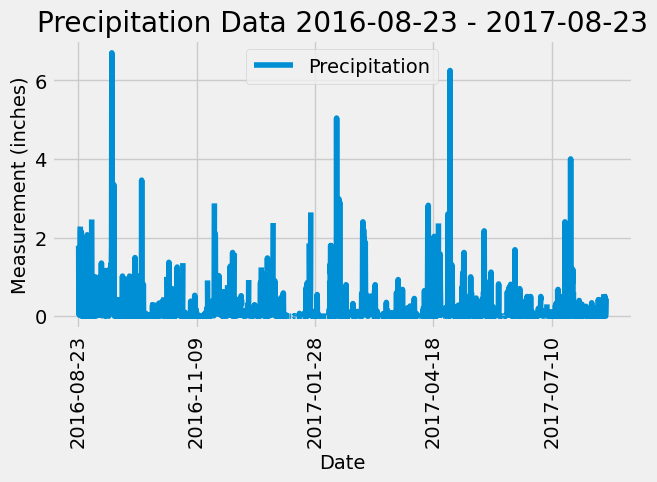

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
from datetime import datetime, timedelta

twelve_months = datetime(2017, 8, 23) - timedelta(days=365)
one_year=twelve_months.strftime("%Y-%m-%d")
# print(one_year)

# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(Measurement.date, (Measurement.prcp)).\
                    filter(Measurement.date >= one_year).all()
precip_query

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_query, columns=['Date', 'Precipitation'])
precip_df.set_index(precip_df['Date'], inplace=True)
precip_df.head()
# Sort the dataframe by date
precip_dates=precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precip_dates.plot(x='Date', y='Precipitation', rot=90)
plt.tight_layout()
plt.title('Precipitation Data 2016-08-23 - 2017-08-23')
plt.xlabel('Date')
plt.ylabel('Measurement (inches)')
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_stats = pd.DataFrame(precip_dates['Precipitation'].describe())
prcp_stats


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.station).count()
station_count

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
station_temps

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

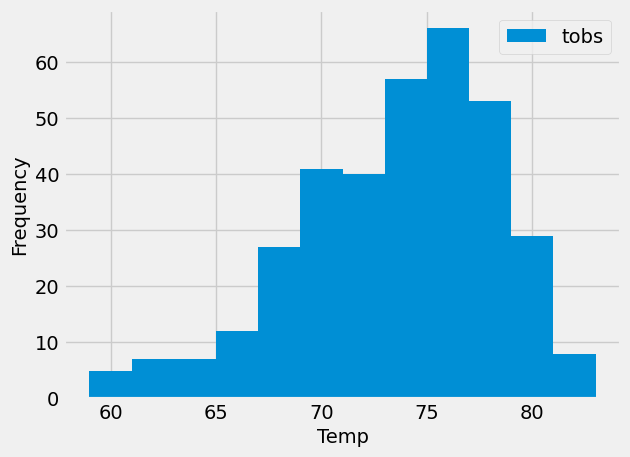

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obv = session.query(Measurement.tobs).filter(Measurement.date >= one_year).filter(Measurement.station == 'USC00519281').all()
temp_df = pd.DataFrame(temp_obv, columns=["tobs"])
# Plot the tobs data
temp_df.plot.hist(bins=12)
plt.xlabel("Temp")
plt.ylabel("Frequency")

# Close Session

In [16]:
# Close Session
session.close()